## Indicators (SMA, EMA, RSI)

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def SMA(df, column="Close", period=20):
    sma = df[column].rolling(window=period, min_periods=period - 1).mean()
    if 'SMA'+str(period) in df.columns.values: df.drop('SMA'+str(period), axis=1, inplace=True)
    return df.join(sma.to_frame('SMA'+str(period)))

def EMA(df, column="Close", period=20):
    ema = df[column].ewm(span=period, min_periods=period - 1).mean()
    if 'EMA'+str(period) in df.columns.values: df.drop('EMA'+str(period), axis=1, inplace=True)
    return df.join(ema.to_frame('EMA'+str(period)))

def RSI(df, column="Close", period=14):
    delta = df[column].diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=period - 1,  adjust=False).mean()
    rDown = down.ewm(com=period - 1, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)    

    if 'RSI'+str(period) in df.columns.values: df.drop('RSI'+str(period), axis=1, inplace=True)
    return df.join(rsi.to_frame('RSI'+str(period)))

def BollingerBand(df, column="Close", period=20):

    sma = df[column].rolling(window=period, min_periods=period - 1).mean()
    std = df[column].rolling(window=period, min_periods=period - 1).std()

    up = (sma + (std * 2)).to_frame('BBANDUP')
    lower = (sma - (std * 2)).to_frame('BBANDLO')
    return df.join(up).join(lower)

In [3]:
parser = lambda x: pd.Timestamp(datetime.fromtimestamp(int(x)/1000))

In [185]:
df = pd.read_csv("./data/2019-1-1-BTCUSDT-5m.csv", index_col="Open time", parse_dates=['Open time','Close time'], date_parser=parser)
d1 = pd.Timestamp('2019-01-2 11:55:00')
d2 = pd.Timestamp('2019-01-3 11:55:00')
d3 = pd.Timestamp('2019-01-2 17:45:00')
d = df[d1:d2].copy()
df2 = df[d3:d2].copy()

In [191]:
n=8 # number of points to be checked before and after 

# Find local peaks
d['min'] = d.iloc[argrelextrema(d.Close.values, np.less_equal, order=n)[0]]['Close']
#d['max'] = d.iloc[argrelextrema(d.Close.values, np.greater_equal, order=n)[0]]['Close']
#d = EMA(d, period=7)
#d = EMA(d, period=25)
#d = EMA(d, period=99)
d = RSI(d, period=14)
df2['limit'] = df2['Close'].cummax() * 0.99

In [192]:
df.loc[d2, 'Close'] - df.loc[d3,"Close"]

71.69000000000005

In [205]:
df.drop(df.iloc[0].name)

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades
Open time,,,,,,,,
2019-01-01 11:05:00,3696.30,3697.24,3689.88,3692.34,62.296581,2019-01-01 11:09:59.999,2.300650e+05,384
2019-01-01 11:10:00,3692.34,3698.93,3692.34,3697.31,43.105333,2019-01-01 11:14:59.999,1.593292e+05,365
2019-01-01 11:15:00,3697.91,3698.75,3693.00,3693.00,48.551084,2019-01-01 11:19:59.999,1.794413e+05,397
2019-01-01 11:20:00,3693.44,3695.98,3690.92,3692.18,47.706443,2019-01-01 11:24:59.999,1.761599e+05,391
2019-01-01 11:25:00,3692.94,3695.20,3690.56,3694.20,35.485194,2019-01-01 11:29:59.999,1.310601e+05,285
2019-01-01 11:30:00,3693.96,3705.00,3693.00,3701.41,58.176001,2019-01-01 11:34:59.999,2.151672e+05,592
2019-01-01 11:35:00,3700.08,3701.26,3697.34,3700.55,30.300324,2019-01-01 11:39:59.999,1.121066e+05,402
2019-01-01 11:40:00,3699.87,3702.39,3699.60,3702.39,83.401389,2019-01-01 11:44:59.999,3.086021e+05,595
2019-01-01 11:45:00,3702.05,3710.55,3702.00,3708.60,96.394933,2019-01-01 11:49:59.999,3.571871e+05,575


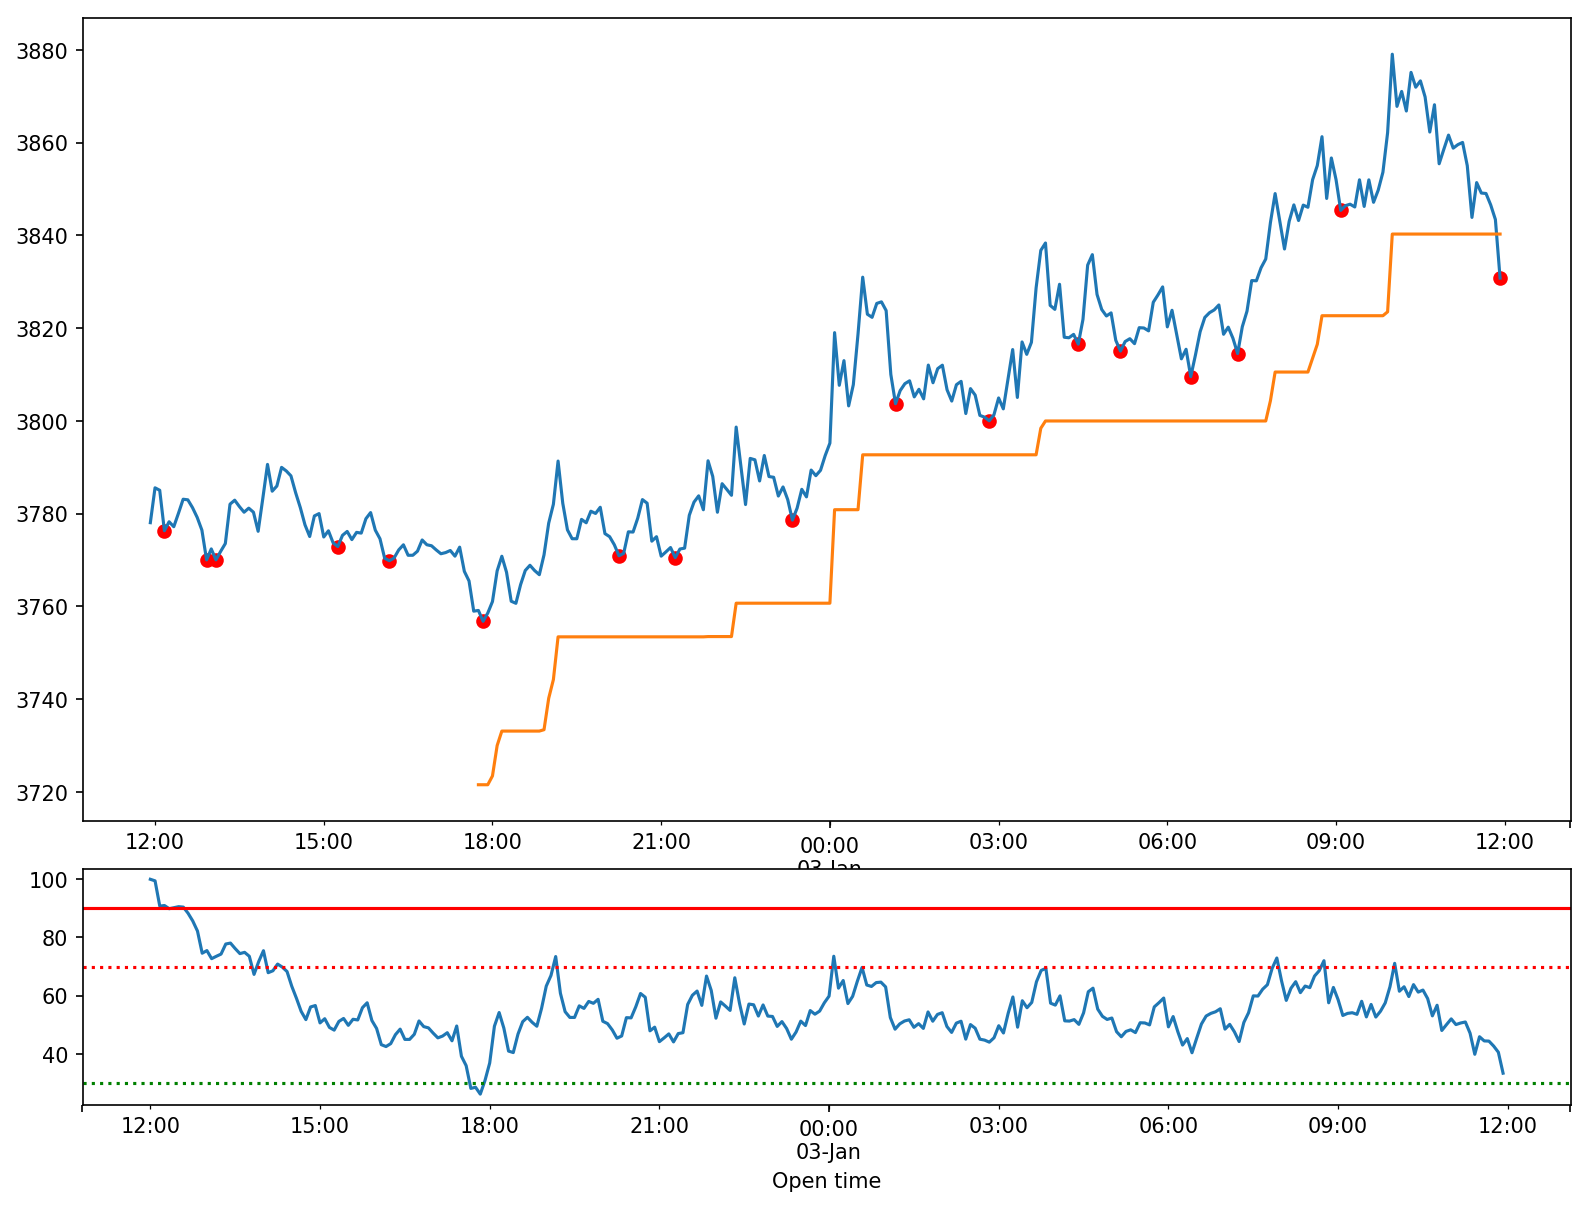

In [194]:
fig = plt.figure(figsize=(12.8, 9.6), dpi=150);
ax1 = fig.add_subplot(4,1,(1,3))

d["Close"].plot()
#d["EMA7"].plot()
#d["EMA25"].plot()
#d["EMA99"].plot()
df2["limit"].plot()
plt.scatter(d.index, d['min'], c='r')
#plt.scatter(d.index, d['max'], c='g')

ax2 = fig.add_subplot(414)
d["RSI14"].plot()
plt.axhline(y=90, color='r', linestyle='-')
plt.axhline(y=70, color='r', linestyle=':')
plt.axhline(y=30, color='g', linestyle=':')